In [4]:
import pandas as pd
import numpy as np


In [5]:
data = pd.read_csv('./mnist_train.csv')

In [6]:
print(data)

       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59995      8    0    0    0    0    0    0    0    0    0  ...      0      0   
59996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
59997      5    0    0    0    0    0    0    0    0    0  ...      0      0   
59998      6    0    0    0    0    0    0    0    0    0  ...      0      0   
59999      8    0    0    0    0    0    0    0    0    0  ...      0      0   

       28x21  28x22  28x23  28x24  28x2

In [7]:
train_data = np.array(data)[:50000].T
test_data = np.array(data)[50000:].T

cols = train_data.shape[1]
X_train = train_data[1:cols]/255.0
Y_train = train_data[0]

X_test = test_data[1:cols]/255.0
Y_test = test_data[0]



In [96]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1000, 0.1)

Iteration  0
Accuracy:  0.10058
Iteration  50
Accuracy:  0.35166
Iteration  100
Accuracy:  0.5463
Iteration  150
Accuracy:  0.72988
Iteration  200
Accuracy:  0.80624
Iteration  250
Accuracy:  0.84598
Iteration  300
Accuracy:  0.86412
Iteration  350
Accuracy:  0.87372
Iteration  400
Accuracy:  0.88058
Iteration  450
Accuracy:  0.8853
Iteration  500
Accuracy:  0.88856
Iteration  550
Accuracy:  0.89116
Iteration  600
Accuracy:  0.89462
Iteration  650
Accuracy:  0.89688
Iteration  700
Accuracy:  0.89968
Iteration  750
Accuracy:  0.90218
Iteration  800
Accuracy:  0.90432
Iteration  850
Accuracy:  0.90592
Iteration  900
Accuracy:  0.90776
Iteration  950
Accuracy:  0.90914
Iteration  1000
Accuracy:  0.91068


In [97]:
def make_predictions(X_pred):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X_pred)
    print(A2)
    predictions = get_predictions(A2)
    return predictions

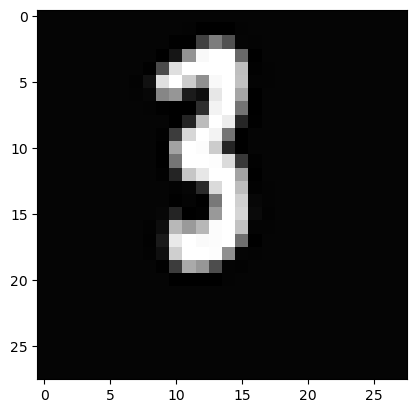

NameError: name 'make_predictions' is not defined

In [13]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# Open an image file
image = Image.open('./canvas(5).png')
# Convert the image to grayscale
image = image.convert('L')

image = ImageOps.invert(image)


# Resize the image to 28x28 pixels
image = image.resize((28, 28))

# Convert image to numpy array
image_np = np.array(image)

# Normalize the pixel values to the range [0, 1]
image_np = image_np / 255.0

plt.gray()
plt.imshow(image_np, interpolation='nearest')
plt.show()

image_np = image_np.reshape((784,1))

print(make_predictions(image_np))

[[2.49821297e-06]
 [2.00768377e-05]
 [4.52596696e-06]
 [9.12908549e-04]
 [6.03940765e-01]
 [2.15855845e-03]
 [2.35641260e-05]
 [8.40946736e-03]
 [1.40476450e-03]
 [3.83122871e-01]]
Prediction:  [4]
Label:  7


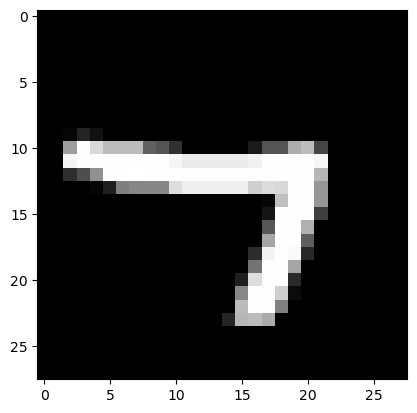

In [114]:
def test_prediction(index):
    current_image = X_test[:, index:index+1]
    prediction = make_predictions(X_test[:, index:index+1])
    label = Y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

test_prediction(233)